In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


Using TensorFlow backend.


In [0]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Val"


In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['accuracy'])




In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [0]:
train_datagen=image.ImageDataGenerator(
rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen=image.ImageDataGenerator(rescale=1/255)

In [8]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    
    

)

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_datagenerator=test_datagen.flow_from_directory(
    
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    

)

Found 60 images belonging to 2 classes.


In [11]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_datagenerator,
    
    validation_steps=2

)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 1.2927 - accuracy: 0.5586 - val_loss: 0.6838 - val_accuracy: 0.8833
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.5447 - accuracy: 0.7812 - val_loss: 0.3479 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.2620 - accuracy: 0.8906 - val_loss: 0.1081 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.4052 - accuracy: 0.8203 - val_loss: 0.3567 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.2453 - accuracy: 0.8867 - val_loss: 0.1268 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.2302 - accuracy: 0.9102 - val_loss: 0.1747 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.1656 - accuracy: 0.9375 - val_loss: 0.1244 - val_accuracy: 0.9000
Epoch 8/10
8/8 [========================

In [12]:
hist.history

{'accuracy': [0.55859375,
  0.78125,
  0.890625,
  0.8203125,
  0.88671875,
  0.91015625,
  0.9375,
  0.95703125,
  0.95703125,
  0.96484375],
 'loss': [1.2927218303084373,
  0.5446964390575886,
  0.2619687393307686,
  0.40523772314190865,
  0.24532767571508884,
  0.23017252422869205,
  0.16557005885988474,
  0.14755679434165359,
  0.0960943060927093,
  0.13825423270463943],
 'val_accuracy': [0.8833333253860474,
  0.9333333373069763,
  0.949999988079071,
  0.9666666388511658,
  0.9666666388511658,
  0.9833333492279053,
  0.8999999761581421,
  0.9833333492279053,
  0.9333333373069763,
  0.9666666388511658],
 'val_loss': [0.6837853789329529,
  0.34790855646133423,
  0.10810450464487076,
  0.3566998839378357,
  0.12683351337909698,
  0.17474006116390228,
  0.1243748590350151,
  0.11307082325220108,
  0.18410484492778778,
  0.14878591895103455]}

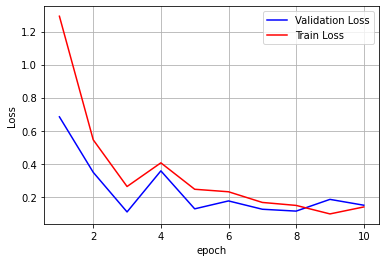

In [13]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,11))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model.save("model_adv.h5")

In [15]:
model.evaluate_generator(train_generator)

[0.05738232657313347, 0.9776785969734192]

In [17]:
model.evaluate_generator(validation_datagenerator)

[0.016145190224051476, 0.9666666388511658]

In [0]:
## Confusion Metrics

In [0]:
model=load_model("model_adv.h5")
y_actual=[]
y_test=[]


In [0]:
normal=0
import os
for i in os.listdir("./CovidDataset/Val/Normal/"):
  normal +=1
  
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [44]:
len(y_actual)

30

In [0]:
covid=0
import os
for i in os.listdir("./CovidDataset/Val/Covid/"):
  covid +=1
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [41]:
normal,covid

(30, 30)

In [0]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(y_actual,y_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


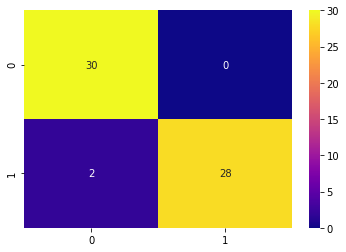

In [49]:
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)

In [1]:
## Out of 30 Covid Patient Model Has Predicted All Covid PAtient. And 2 Patient Who dont Have Covid Have also Being Detected
## as Covid Positive.